In [1]:
import xml.etree.ElementTree as ET
import os

In [5]:
#See sample xml file for reference
def parse_annotation(ann_dir, img_dir, labels=[], x_ratio =1, y_ratio = 1):
    all_imgs = []
    seen_labels = {}
    
    for ann in sorted(os.listdir(ann_dir)):
        img = {'object':[]}
        print(ann_dir + ann)
        tree = ET.parse(ann_dir + ann)
        
        for elem in tree.iter():
            if 'filename' in elem.tag:
                img['filename'] = img_dir + elem.text
            if 'width' in elem.tag:
                img['width'] = int(elem.text)
            if 'height' in elem.tag:
                img['height'] = int(elem.text)
            if 'object' in elem.tag or 'part' in elem.tag:
                obj = {}
                
                for attr in list(elem):
                    if 'name' in attr.tag:
                        obj['name'] = attr.text

                        if obj['name'] in seen_labels:
                            seen_labels[obj['name']] += 1
                        else:
                            seen_labels[obj['name']] = 1
                        
                        if len(labels) > 0 and obj['name'] not in labels:
                            break
                        else:
                            img['object'] += [obj]
                            
                    if 'bndbox' in attr.tag:
                        for dim in list(attr):
                            if 'xmin' in dim.tag:
                                obj['xmin'] = int(round(float(dim.text))*x_ratio)
                            if 'ymin'  in dim.tag:
                                obj['ymin'] = int(round(float(dim.text))*y_ratio)
                            if 'xmax' in dim.tag:
                                obj['xmax'] = int(round(float(dim.text))*x_ratio)
                            if 'ymax' in dim.tag:
                                obj['ymax'] = int(round(float(dim.text))*y_ratio)

        if len(img['object']) > 0:
            all_imgs += [img]
                        
    return all_imgs, seen_labels

In [6]:
LABELS = ['piglet', 'pig'] # array containing labels. Can be more than one.
train_image_folder = r'C:\Users\lasse\Documents\GitHub\keras-retinanet-pig\PigDatasetConservative\\'
train_annot_folder = r'C:\Users\lasse\Documents\GitHub\keras-retinanet-pig\annotationsConservative\\'

train_imgs, seen_train_labels = parse_annotation(train_annot_folder, train_image_folder, labels=LABELS)

#label_ids = seen_train_labels.copy()
labels_ids = {'piglet': 'piglet', 'pig': 'pig'}

C:\Users\lasse\Documents\GitHub\keras-retinanet-pig\annotationsConservative\\1.xml
C:\Users\lasse\Documents\GitHub\keras-retinanet-pig\annotationsConservative\\10.xml
C:\Users\lasse\Documents\GitHub\keras-retinanet-pig\annotationsConservative\\103.xml
C:\Users\lasse\Documents\GitHub\keras-retinanet-pig\annotationsConservative\\104.xml
C:\Users\lasse\Documents\GitHub\keras-retinanet-pig\annotationsConservative\\105.xml
C:\Users\lasse\Documents\GitHub\keras-retinanet-pig\annotationsConservative\\106.xml
C:\Users\lasse\Documents\GitHub\keras-retinanet-pig\annotationsConservative\\107.xml
C:\Users\lasse\Documents\GitHub\keras-retinanet-pig\annotationsConservative\\108.xml
C:\Users\lasse\Documents\GitHub\keras-retinanet-pig\annotationsConservative\\109.xml
C:\Users\lasse\Documents\GitHub\keras-retinanet-pig\annotationsConservative\\11.xml
C:\Users\lasse\Documents\GitHub\keras-retinanet-pig\annotationsConservative\\110.xml
C:\Users\lasse\Documents\GitHub\keras-retinanet-pig\annotationsConser

train_imgs #Checking data format

In [7]:
f = open ('labels.txt', 'w+')
for img_number in range(0,len(train_imgs)):
    image = train_imgs[img_number]
    im_name = image['filename'].split('/')[-1]
    objects = image['object']
    # print (im_name)
#     line = im_name
    for objs in objects:
        xmin = objs['xmin']
        ymin = objs['ymin']
        xmax = objs['xmax']
        ymax = objs['ymax']
        c_id = labels_ids[objs['name']]
#         print (xmin, ymin, xmax, ymax, c_id)
        line = im_name+','+str(xmin)+',' +str(ymin)+',' +str(xmax)+','+str(ymax)+','+ str(c_id) +'\n'
        f.write (line)

  #  print (line)
    
f.close()

In [4]:
import os
from keras_retinanet.models import load_model

#model_path = os.path.join('..', 'snapshots', 'resnet50_coco_best_v2.1.0.h5')



# load retinanet model
model = load_model(r'C:\Users\lasse\DMiAI2022\pig-piglet-detection\keras-retinanet-main\snapshots\mymodel.h5', backbone_name = 'resnet101')

ModuleNotFoundError: No module named 'keras_retinanet.utils.compute_overlap'

1
0.110893995
hey
[309 212 602 393]
1
0.071363516
hey
[ 99 223 406 595]
0
0.06590047
hey
[310 209 603 395]
1
0.06178254
hey
[109 133 545 940]


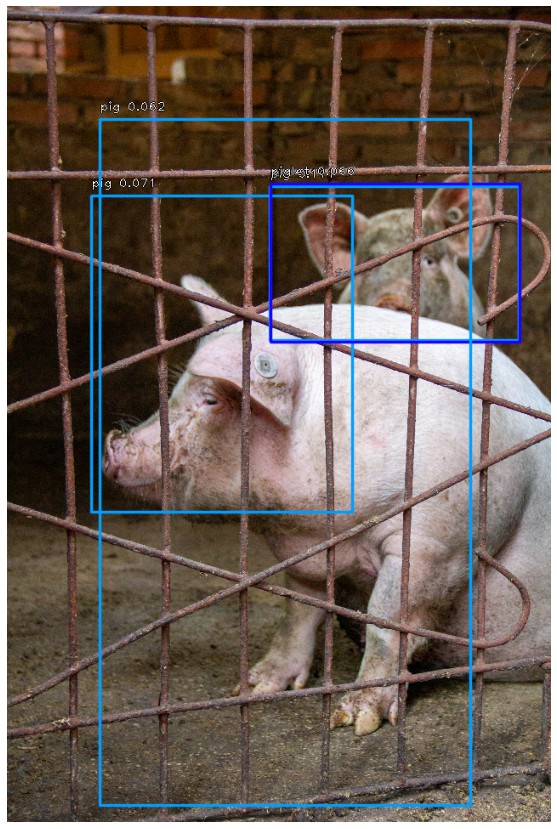

In [16]:
from tensorflow import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

#2, 
image = read_image_bgr(r"C:\Users\lasse\Desktop\image9584.png")
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

labels_to_names = {0: 'piglet', 1: 'pig'}

boxes, scores, labels = model.predict(np.expand_dims(image, axis=0))
fin = 0
count = 0
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    count = count + 1
    if score < 0.05:
        break
    print(label)
    print(score)
    color = label_color(label)
    b = box.astype(int)
    sc = score
    box = draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)

In [17]:
from tensorflow import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time


image = read_image_bgr(r"C:\Users\lasse\Desktop\WheresWaldo\wheres-waldo\Hey-Waldo\dataset\11_1_2.jpg")
#print(type(image))
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

labels_to_names = {0: 'piglet', 1: 'pig}

image = preprocess_image(image)
image, scale = resize_image(image)

start = time.time()
print(type(image))
print(image.shape)
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print(boxes.shape)
print(scores.shape)
print(labels.shape)
print("processing time: ", time.time() - start)
# correct for image scale
boxes /= scale
fin = 0
count = 0
print(boxes)
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    count = count + 1
    if score < 0.5:
        break
    color = label_color(label)
    b = box.astype(int)
    sc = score
    box = draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
print(b)
print(sc)
y_center = b[1] + (b[3] - b[1]) / 2
x_center = b[0] + (b[2] - b[0]) / 2
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.imsave("test.jpg", draw)
plt.scatter([y_center], [x_center], color='r')
plt.show()

<class 'numpy.ndarray'>
(800, 800, 3)


ValueError: not enough values to unpack (expected 3, got 2)

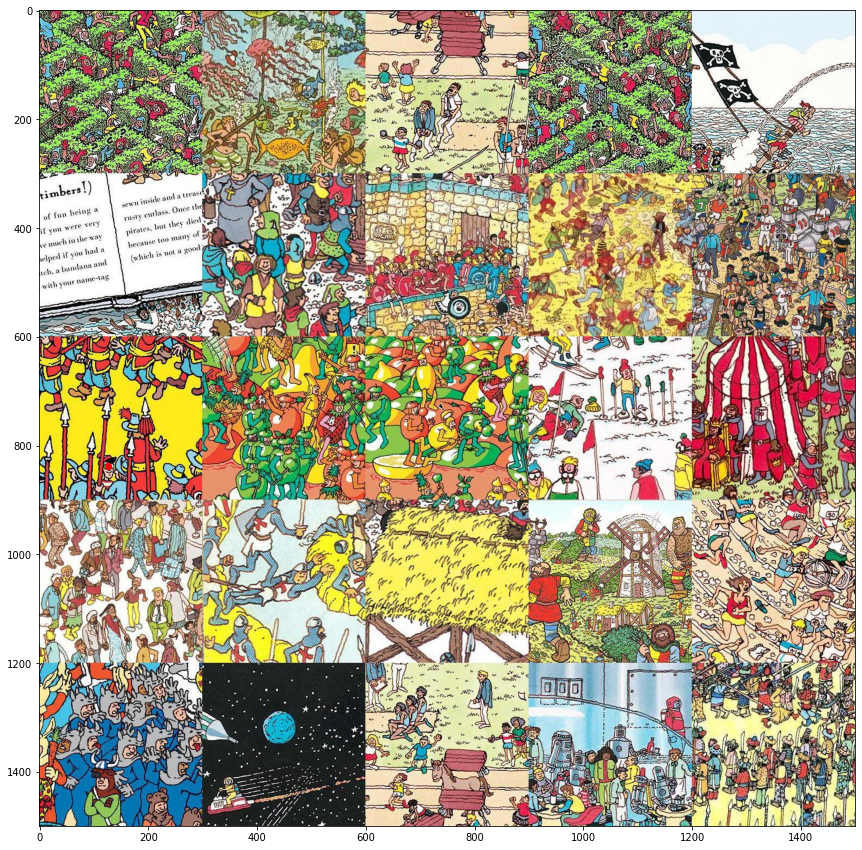

In [24]:
img = plt.imread(r'C:\Users\lasse\Desktop\WheresWaldo\waldo.jpg')
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.scatter([126], [837.5], color='r')

In [51]:
y_center = 61.29963 + (120.43578 - 61.29963) / 2
x_center = 101.26073 + (150.58293 - 101.26073) / 2
print(x_center, y_center)

(x1, y1, x2, y2)

coords = [101.26073, 61.29963, 150.58293, 120.43578]
centerx,centery = ( np.average(coords[:2]),np.average(coords[2:]))
print(centerx,centery)




125.92183 90.867705


NameError: name 'x1' is not defined

In [ ]:
from tensorflow import keras
from PIL import Image, ImageDraw
# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
import image_slicer

image = 0
scale = 0
def _preprocess_data(data):
    #Split billeder i 15 billeder
    tiles = image_slicer.slice(data, 15)
    images = []
    for tile in tiles:
        test = np.array(tile.image)
        images.append(test)
        
    result = []
    for image in images:
        draw = image.copy()
        draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
        labels_to_names = {1: 'Waldo'}
        image = preprocess_image(image)
        image, scale = resize_image(image)
        result.append(image)
        
    result = np.array(result)
    print("wtf")
    print(result.shape)
    return result


#image = read_image_bgr(r"C:\Users\lasse\Desktop\WheresWaldo\waldo.jpg")

images = _preprocess_data(r"C:\Users\lasse\Desktop\WheresWaldo\waldo.jpg")
print(images.shape)
boxes, scores, labels = model.predict(images)
print(scores)

for score in scores:
    print(score)
    

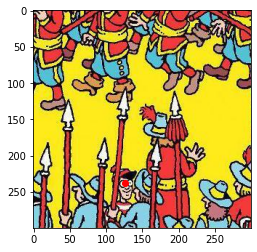

In [22]:
import image_slicer
images = image_slicer.slice(r"C:\Users\lasse\Desktop\WheresWaldo\waldo.jpg", 25)

plt.imshow(images[10].image)
plt.scatter([126.5], [237.5], color='r')

